# Continuous-time dynamical systems: ODEs, simulations and discovery of their attractors & repellors

In [159]:
%matplotlib inline
from math import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import random

## Linear ODEs: phase lines, equilibrium at 0, stability
The basic ODE is $\dot{X}=RX$, $R$ being a real number.<br>The stability of the (unique) equilibrium will depend upon the value of $R$.
We will simulate this ODE by using an Euler Scheme, namely: starting from an initial condition $X_0$, we will compute an approximation of the solution at increasing time instant with a fixed time increment of $\Delta t$ such that: 

$X(t+\Delta t)=X(t)+\Delta t\dot{X}(t)=X(t)+\Delta t RX$.

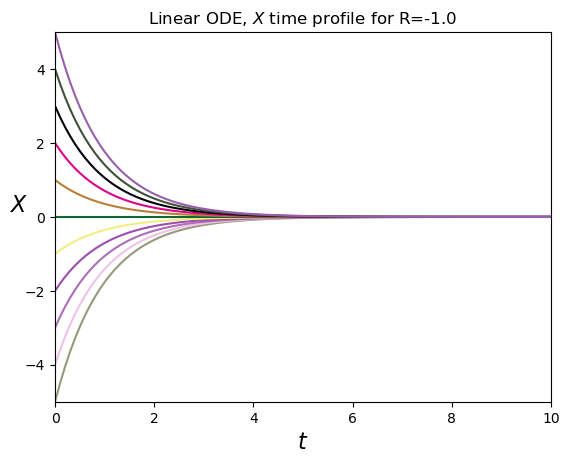

In [160]:
# Compute an approximation solution for R=-1 via the Euler scheme
R=-1.0                                           # value of the parameter
ini=np.linspace(-5,5,11)                         # initial conditions
t_span = (0, 10)                                 # Time span for simulation
t_eval = np.linspace(t_span[0], t_span[1], 100)  # Time points to evaluate
dt=t_span[1]/np.shape(t_eval)[0]
for i in (ini):
    X=np.zeros(np.shape(t_eval)[0])
    X[0]=i
    for j in range(np.shape(t_eval)[0]-1):
        X[j+1]=X[j]+R*X[j]*dt
# Plot the solution: X vs. time
    with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
        random_color = (random.random(), random.random(), random.random())
        plt.plot(t_eval,X,color=random_color)
        plt.xlabel('$t$',fontsize=16)
        plt.ylabel('$X$',fontsize=16,rotation=0)
        plt.xlim(0,10)
        plt.ylim(-5,5)
        plt.title(f'Linear ODE, $X$ time profile for R={R}')
#    
plt.show()

### Comments on the linear system X' = RX
we verify by direct simulation that :

> for R < 0 : the equilibrium state at X = 0 is stable

> for R > 0 : the equilibrium state is unstable

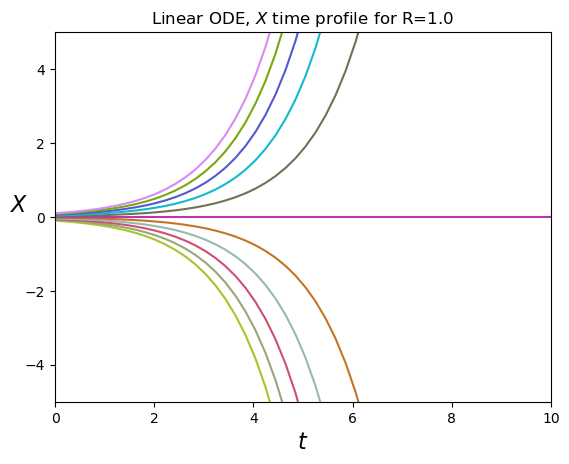

In [161]:
# Compute an approximation solution for R=1 via the Euler scheme
R=1.0                                          # value of the parameter
ini=np.linspace(-0.1,0.1,11)                   # initial conditions
t_span = (0,20)                                # Time span for simulation
t_eval = np.linspace(t_span[0],t_span[1],100)  # Time points to evaluate
dt=t_span[1]/np.shape(t_eval)[0]
for i in (ini):
    X=np.zeros(np.shape(t_eval)[0])
    X[0]=i
    for j in range(np.shape(t_eval)[0]-1):
        X[j+1]=X[j]+R*X[j]*dt
# Plot the solution: X vs. time
    with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
        random_color = (random.random(), random.random(), random.random())
        plt.plot(t_eval,X,color=random_color)
        plt.xlabel('$t$',fontsize=16)
        plt.ylabel('$X$',fontsize=16,rotation=0)
        plt.xlim(0,10)
        plt.ylim(-5,5)
        plt.title(f'Linear ODE, $X$ time profile for R={R}')
#    
plt.show()

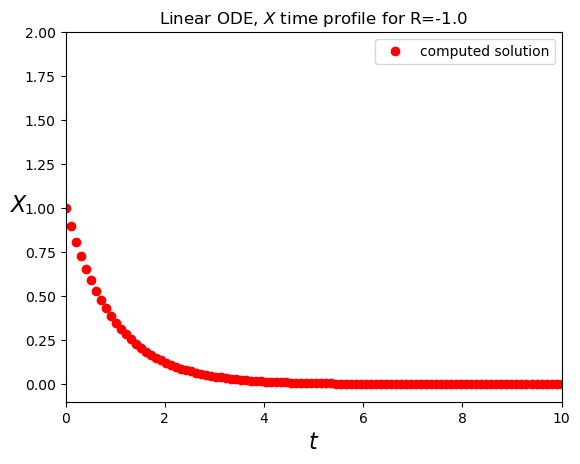

In [ ]:
# Compare with the exact solution
R=-1.0                                           # value of the parameter
X0=1.0                                           # initial condition
t_span = (0, 10)                                 # Time span for simulation
t_eval = np.linspace(t_span[0], t_span[1], 100)   # Time points to evaluate
dt=t_span[1]/np.shape(t_eval)[0]
X=np.zeros(np.shape(t_eval)[0])
X[0]=X0
for j in range(np.shape(t_eval)[0]-1):
    X[j+1]=X[j]+R*X[j]*dt
# Plot the computed solution vs. the exact one: X vs. time
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.plot(t_eval,X,'ro',label="computed solution")
    # plot here the exact solution along t_eval
    plt.xlabel('$t$',fontsize=16)
    plt.ylabel('$X$',fontsize=16,rotation=0)
    plt.xlim(0,10)
    plt.ylim(-0.1,2)
    plt.title(f'Linear ODE, $X$ time profile for R={R}')
    plt.legend()
#    
plt.show()

## "Linear" ODE: Bathtub example
Following on the example seen in the slides, we consider a change equation (that is, an ODE) for the bathtub water level $X$, with two terms to take into account:<br>
* *water inflow through the faucet:* $\text{inflow}=I$, where $I$ is a fixed parameter;
* *water outflow through the drain:* $\text{outflow}=kX$, where $k$ is a fixed parameter.
Hence, we obtain the following ODE:
$\dot{X}=\text{inflow}-\text{outflow}$,
that is,<br>
<span style=color:blue>$$\dot{X}=I-kX.$$</span>
And we will simulate this ODE using an Euler scheme and observe if there is an equilibrium for given values of $I$ and $k$.<br> In fact, we will create a function that takes the values of $I$ and $k$ as inputs and outputs simulations of the ODE, for these values of the parameter, and for a set of initial conditions.

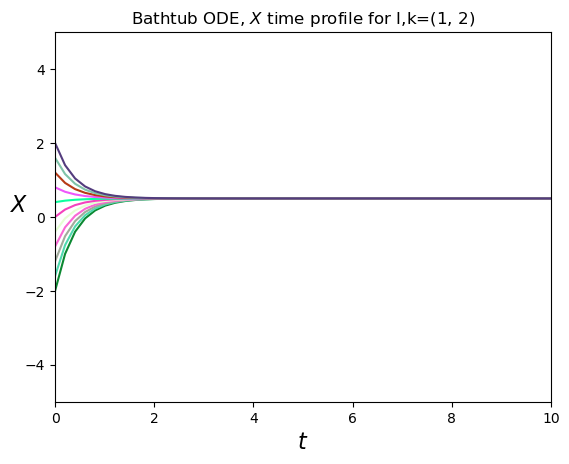

In [184]:
# Define that function
def bathtub(I, k):
    ini=np.linspace(-2,2,11)                      # initial conditions
    t_span = (0,20)                               # Time span for simulation
    t_eval = np.linspace(t_span[0],t_span[1],100) # Time points to evaluate
    dt=t_span[1]/np.shape(t_eval)[0]
    for i in (ini):
        X=np.zeros(np.shape(t_eval)[0])
        X[0]=i
        for j in range(np.shape(t_eval)[0]-1):
            X[j+1] = X[j] + dt * (I - k * X[j])
        # Plot the solution: X vs. time
        with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
            random_color = (random.random(), random.random(), random.random())
            plt.plot(t_eval,X,color=random_color)
            plt.xlabel('$t$',fontsize=16)
            plt.ylabel('$X$',fontsize=16,rotation=0)
            plt.xlim(0,10)
            plt.ylim(-5,5)
            plt.title(f'Bathtub ODE, $X$ time profile for I,k={I,k}')
#    
plt.show(bathtub(1,2))

## Nonlinear ODE: stable vs. unstable equilibrium
We will simulate a nonlinear ODE that is a continuous-time version of the map studied in lab1, namely the *logistic map*. That is, the *logistic ODE*: $\dot{x}=Rx(1-kx)$ = Rx - Rkx^2$

equilibrium is when x = 0
which gives Rx =(1-kx) = 0
hance either Rx = 0
or 
1-kx=0 
x=1/k

/var/folders/4m/jbzcgm115rbdm2hwhvzwyt640000gn/T/ipykernel_16005/396538439.py:13: RuntimeWarning: overflow encountered in scalar multiply
  x[j+1] = x[j] + dt * (R * x[j] * (1 - k * x[j]))
/var/folders/4m/jbzcgm115rbdm2hwhvzwyt640000gn/T/ipykernel_16005/396538439.py:13: RuntimeWarning: overflow encountered in scalar multiply
  x[j+1] = x[j] + dt * (R * x[j] * (1 - k * x[j]))
/var/folders/4m/jbzcgm115rbdm2hwhvzwyt640000gn/T/ipykernel_16005/396538439.py:13: RuntimeWarning: overflow encountered in scalar multiply
  x[j+1] = x[j] + dt * (R * x[j] * (1 - k * x[j]))
/var/folders/4m/jbzcgm115rbdm2hwhvzwyt640000gn/T/ipykernel_16005/396538439.py:13: RuntimeWarning: overflow encountered in scalar multiply
  x[j+1] = x[j] + dt * (R * x[j] * (1 - k * x[j]))
/var/folders/4m/jbzcgm115rbdm2hwhvzwyt640000gn/T/ipykernel_16005/396538439.py:13: RuntimeWarning: overflow encountered in scalar multiply
  x[j+1] = x[j] + dt * (R * x[j] * (1 - k * x[j]))


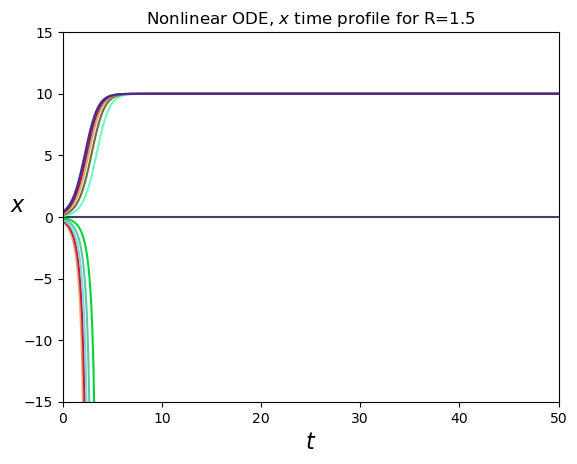

In [188]:
# Compute an approximation solution for R=1.5 and k=1/10 via the Euler scheme
R=1.5                                            # value of the parameter R
k=1/10                                           # value of the parameter k   
ini=np.linspace(-0.4,0.4,11)                     # initial conditions
t_span = (0, 50)                                 # Time span for simulation
t_eval = np.linspace(t_span[0], t_span[1], 500)  # Time points to evaluate
dt=t_span[1]/np.shape(t_eval)[0]
for i in (ini):
    x=np.zeros(np.shape(t_eval)[0])
    x[0]=i
    for j in range(np.shape(t_eval)[0]-1):
        # Euler scheme for the logistic ODE: dx/dt = R*x*(1 - k*x)
        x[j+1] = x[j] + dt * (R * x[j] * (1 - k * x[j]))
# Plot the solution: x vs. time
    with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
        random_color = (random.random(), random.random(), random.random())
        plt.plot(t_eval,x,color=random_color)
        plt.xlabel('$t$',fontsize=16)
        plt.ylabel('$x$',fontsize=16,rotation=0)
        plt.xlim(0,50)
        plt.ylim(-15,15)
        plt.title(f'Nonlinear ODE, $x$ time profile for R={R}')
#    
plt.show()

/var/folders/4m/jbzcgm115rbdm2hwhvzwyt640000gn/T/ipykernel_16005/698954818.py:13: RuntimeWarning: overflow encountered in scalar multiply
  x[j+1] = x[j] + dt * (R * x[j] * (1 - k * x[j]))
/var/folders/4m/jbzcgm115rbdm2hwhvzwyt640000gn/T/ipykernel_16005/698954818.py:18: RuntimeWarning: overflow encountered in multiply
  dxdt = R * x * (1 - k * x)
/var/folders/4m/jbzcgm115rbdm2hwhvzwyt640000gn/T/ipykernel_16005/698954818.py:13: RuntimeWarning: overflow encountered in scalar multiply
  x[j+1] = x[j] + dt * (R * x[j] * (1 - k * x[j]))
/var/folders/4m/jbzcgm115rbdm2hwhvzwyt640000gn/T/ipykernel_16005/698954818.py:18: RuntimeWarning: overflow encountered in multiply
  dxdt = R * x * (1 - k * x)
/var/folders/4m/jbzcgm115rbdm2hwhvzwyt640000gn/T/ipykernel_16005/698954818.py:13: RuntimeWarning: overflow encountered in scalar multiply
  x[j+1] = x[j] + dt * (R * x[j] * (1 - k * x[j]))
/var/folders/4m/jbzcgm115rbdm2hwhvzwyt640000gn/T/ipykernel_16005/698954818.py:18: RuntimeWarning: overflow encoun

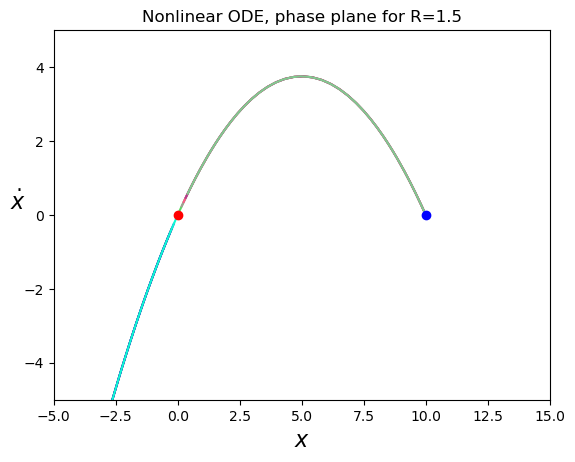

In [189]:
# Compute an approximation solution for R=1.5 and k=1/10 via the Euler scheme
R=1.5                                            # value of the parameter R
k=1/10                                           # value of the parameter k   
ini=np.linspace(-0.4,0.4,11)                     # initial conditions
t_span = (0, 50)                                 # Time span for simulation
t_eval = np.linspace(t_span[0], t_span[1], 500)  # Time points to evaluate
dt=t_span[1]/np.shape(t_eval)[0]
for i in (ini):
    x=np.zeros(np.shape(t_eval)[0])
    x[0]=i
    for j in range(np.shape(t_eval)[0]-1):
        # Euler scheme for the logistic ODE: dx/dt = R*x*(1 - k*x)
        x[j+1] = x[j] + dt * (R * x[j] * (1 - k * x[j]))
    # Plot the solution: dx/dt vs. x
    with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
        random_color = (random.random(), random.random(), random.random())
        # plot \dot{x} vs. x
        dxdt = R * x * (1 - k * x)
        plt.plot(x, dxdt, color=random_color)
        plt.xlabel('$x$',fontsize=16)
        plt.ylabel('$\dot{x}$',fontsize=16,rotation=0)
        plt.xlim(-5,15)
        plt.ylim(-5,5)
        plt.title(f'Nonlinear ODE, phase plane for R={R}')
#    
plt.plot(0,0,'ro')
plt.plot(10,0,'bo')
plt.show()